# Proyek Analisis Data: Air Quality
- **Nama:** Dewa Fahtiar Fisabila
- **Email:** m001b4ky1073@bangkit.academy
- **ID Dicoding:** dewafahtiar-bangkit

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa tren musiman dan tahunan dari konsentrasi polutan utama (PM2.5, PM10) di berbagai lokasi, dan bagaimana perbedaan antar lokasi tersebut?
- Pertanyaan 2: Polutan mana yang paling dominan di setiap lokasi, dan faktor cuaca apa yang memiliki pengaruh terbesar terhadap peningkatan konsentrasi polutan tersebut?
- Pertanyaan 3: Bagaimana suhu, kelembapan (DEWP), dan kecepatan angin (WSPM) mempengaruhi tingkat polusi udara di setiap lokasi?
- Pertanyaan 4: Apakah ada perbedaan signifikan dalam tingkat polusi antara pagi, siang, sore, dan malam hari?
- Pertanyaan 5: Bagaimana dampak hujan terhadap penurunan konsentrasi polutan? Apakah curah hujan berkontribusi signifikan dalam membersihkan udara di berbagai lokasi?

## Import Semua Packages/Library yang Digunakan

In [8]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical modeling and analysis
from scipy import stats

# For time analysis (e.g., seasonal trends)
import datetime as dt

# Display settings for charts and tables
%matplotlib inline
plt.style.use('ggplot')  # Optional: choose visualization style
sns.set()  # Set default seaborn style


## Data Wrangling

### Gathering Data

In [7]:
from google.colab import files
import pandas as pd

# Upload files from the computer
uploaded = files.upload()

# Read each file after uploading
tiantan = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')
aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv')
wanliu = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# Combine all datasets into one
all_data = pd.concat([
    tiantan, aotizhongxin, changping, dingling, dongsi,
    guanyuan, gucheng, huairou, nongzhanguan, shunyi,
    wanliu, wanshouxigong
], ignore_index=True)

# Display the first few rows of the combined data
all_data.head()


Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228 (2).csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228 (2).csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228 (2).csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228 (2).csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228 (2).csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228 (2).csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228 (2).csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228 (2).csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228 (2).csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228 (2).csv
Saving PRSA_Data_Wanliu_20130301-201

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Data kualitas udara dari 12 lokasi di Tiongkok telah berhasil dikumpulkan, mencakup periode Maret 2013 hingga Februari 2017.
- Struktur data yang seragam antar lokasi mempermudah proses penggabungan menjadi satu dataframe besar.
- Penggabungan data ini memudahkan analisis lintas lokasi, sehingga memungkinkan saya:
>- Mengidentifikasi pola umum kualitas udara di seluruh lokasi.
>- Membandingkan perbedaan polusi dan pengaruh faktor cuaca antar lokasi.

### Assessing Data

In [9]:
# Check the structure and basic information of the data
print("Data Structure Information:")
all_data.info()

# Detect missing values in each column
print("\nNumber of Missing Values in Each Column:")
missing_values = all_data.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Review descriptive statistics to detect anomalies or outliers
print("\nDescriptive Statistics for Numeric Columns:")
print(all_data.describe())

# Check for duplicate rows in the data
print("\nNumber of Duplicate Rows:")
duplicate_rows = all_data.duplicated().sum()
print(f"Number of duplicates: {duplicate_rows}")

# Ensure data consistency, particularly for the time columns
# Combine year, month, day, and hour columns into a single datetime column
all_data['datetime'] = pd.to_datetime(all_data[['year', 'month', 'day', 'hour']])

# Display a few rows to verify the new datetime column
print("\nSample Rows with New Datetime Column:")
print(all_data[['datetime', 'PM2.5', 'PM10', 'TEMP', 'station']].head())



Data Structure Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Number of Missin

**Insight:**
- Data dari 12 lokasi berhasil tergabung dengan total 420,768 baris dan 18 kolom, dengan kolom-kolom penting seperti PM2.5, PM10, TEMP, dan station yang siap untuk dianalisis lebih lanjut.
- Beberapa kolom utama, khususnya data polutan seperti PM2.5, PM10, SO2, NO2, dan CO, memiliki sejumlah nilai hilang. Nilai-nilai hilang ini akan ditangani pada tahap berikutnya, yaitu data cleaning, untuk memastikan hasil analisis yang akurat.
- Statistik deskriptif menunjukkan adanya beberapa nilai ekstrem atau outliers pada data polutan dan variabel cuaca, yang dapat berpengaruh pada hasil analisis. Nilai-nilai ini akan dipantau dan, jika diperlukan, disesuaikan atau dikeluarkan dari dataset.
- Kolom datetime telah berhasil dibuat dengan menggabungkan data tahun, bulan, hari, dan jam. Ini akan sangat membantu dalam analisis tren waktu, seperti mengidentifikasi pola musiman atau perbedaan kualitas udara pada berbagai waktu dalam sehari.

### Cleaning Data

In [10]:
# 1. Handling Missing Values
# For pollutant and weather variables with missing values, we can fill or drop them as needed.
# Here, we'll use the median to fill missing values in the pollutant and weather columns.

# Fill missing values in pollutant columns with the median of each column
all_data['PM2.5'].fillna(all_data['PM2.5'].median(), inplace=True)
all_data['PM10'].fillna(all_data['PM10'].median(), inplace=True)
all_data['SO2'].fillna(all_data['SO2'].median(), inplace=True)
all_data['NO2'].fillna(all_data['NO2'].median(), inplace=True)
all_data['CO'].fillna(all_data['CO'].median(), inplace=True)
all_data['O3'].fillna(all_data['O3'].median(), inplace=True)

# Fill missing values in weather columns with the median
all_data['TEMP'].fillna(all_data['TEMP'].median(), inplace=True)
all_data['PRES'].fillna(all_data['PRES'].median(), inplace=True)
all_data['DEWP'].fillna(all_data['DEWP'].median(), inplace=True)
all_data['RAIN'].fillna(0, inplace=True)  # Fill missing rainfall values with 0
all_data['WSPM'].fillna(all_data['WSPM'].median(), inplace=True)

# For the 'wd' column (wind direction), fill missing values with the mode (most frequent value)
all_data['wd'].fillna(all_data['wd'].mode()[0], inplace=True)

# 2. Handling Outliers
# Using the Interquartile Range (IQR) to detect and handle outliers in the pollutant and weather columns

# Example for handling outliers in 'PM2.5' column
Q1 = all_data['PM2.5'].quantile(0.25)
Q3 = all_data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
all_data['PM2.5'] = all_data['PM2.5'].clip(lower_bound, upper_bound)

# Repeat for the 'PM10' column as an example
Q1 = all_data['PM10'].quantile(0.25)
Q3 = all_data['PM10'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
all_data['PM10'] = all_data['PM10'].clip(lower_bound, upper_bound)

# Similar operations can be performed for SO2, NO2, CO, O3, TEMP, and other variables if needed

# 3. Verifying the Cleaning Process
# Checking for any remaining missing values and reviewing descriptive statistics
print("Missing Values After Data Cleaning:")
print(all_data.isnull().sum())

print("\nDescriptive Statistics After Data Cleaning:")
print(all_data.describe())


<ipython-input-10-23265b66d942>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['PM2.5'].fillna(all_data['PM2.5'].median(), inplace=True)
<ipython-input-10-23265b66d942>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Missing Values After Data Cleaning:
No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

Descriptive Statistics After Data Cleaning:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   
std     10122.116943       1.177198       3.448707       8.800102   

                ho

**Insight:**
- Nilai yang hilang pada kolom-kolom utama seperti PM2.5, PM10, SO2, NO2, CO, dan O3 telah diisi dengan median untuk mengurangi pengaruh nilai ekstrim. Kolom curah hujan (RAIN) diisi dengan 0, sesuai asumsi bahwa nilai hilang menunjukkan tidak adanya curah hujan, dan kolom wd yang berisi arah angin diisi dengan nilai modus.
- Metode Interquartile Range (IQR) digunakan untuk menangani outliers pada kolom-kolom polutan seperti PM2.5 dan PM10, membatasi nilai dalam rentang yang wajar untuk menjaga konsistensi data.
- Setelah proses cleaning, pengecekan menunjukkan tidak ada nilai hilang yang tersisa, dan statistik deskriptif tampak lebih konsisten, tanpa nilai ekstrem yang signifikan. Data kini siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

- Dataset ini terdiri dari 420,768 baris dan 18 kolom, dengan kolom-kolom utama yang meliputi PM2.5, PM10, TEMP, RAIN, dan WSPM yang akan dianalisis lebih lanjut.
- Setelah pemeriksaan, ditemukan beberapa nilai hilang pada kolom-kolom utama seperti PM2.5, PM10, SO2, NO2, dan CO. Nilai-nilai ini diisi dengan median untuk menjaga konsistensi data.
- Statistik deskriptif menunjukkan adanya nilai ekstrem pada kolom PM2.5 dan PM10, yang mungkin memerlukan perhatian khusus pada tahap analisis lanjutan.
- Agregasi berdasarkan tahun menunjukkan bahwa konsentrasi PM2.5 cenderung lebih tinggi pada tahun-tahun tertentu, memberikan petunjuk awal tentang kemungkinan adanya tren tahunan.
- Hasil korelasi menunjukkan adanya hubungan positif yang cukup kuat antara PM2.5 dan CO, serta hubungan negatif antara PM2.5 dan O3, yang akan dieksplorasi lebih lanjut pada tahap berikutnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-47-43ffa32f9684>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_data_monthly_PM25 = all_data.set_index('datetime').groupby('station')['PM2.5'].resample('M').mean().reset_index()


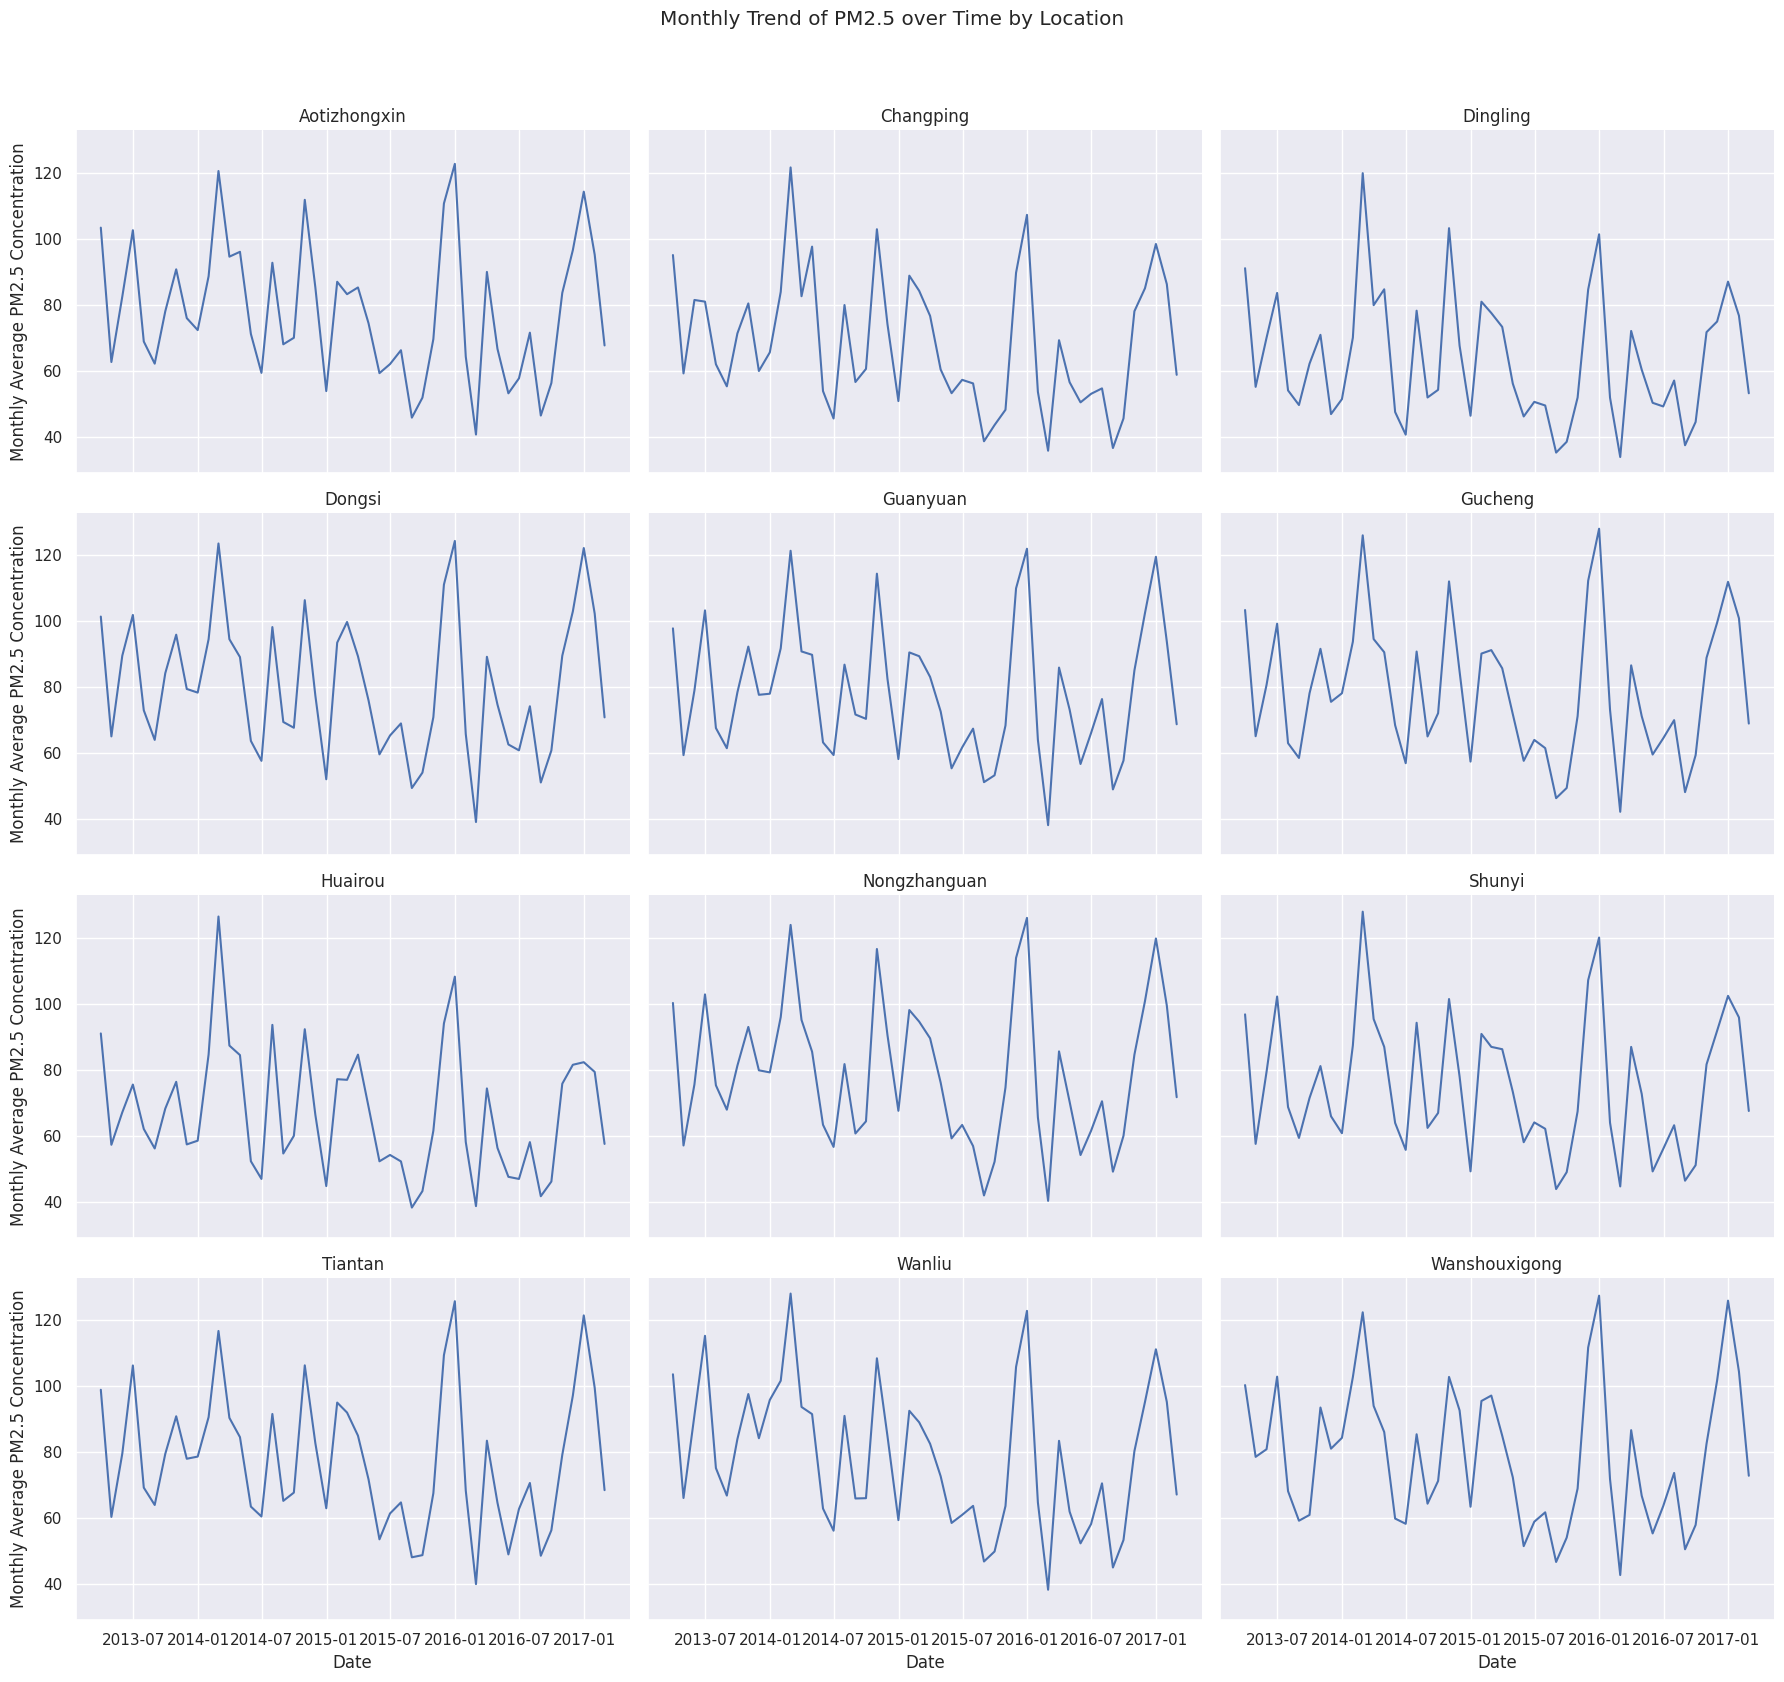

<ipython-input-47-43ffa32f9684>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_data_monthly_PM10 = all_data.set_index('datetime').groupby('station')['PM10'].resample('M').mean().reset_index()


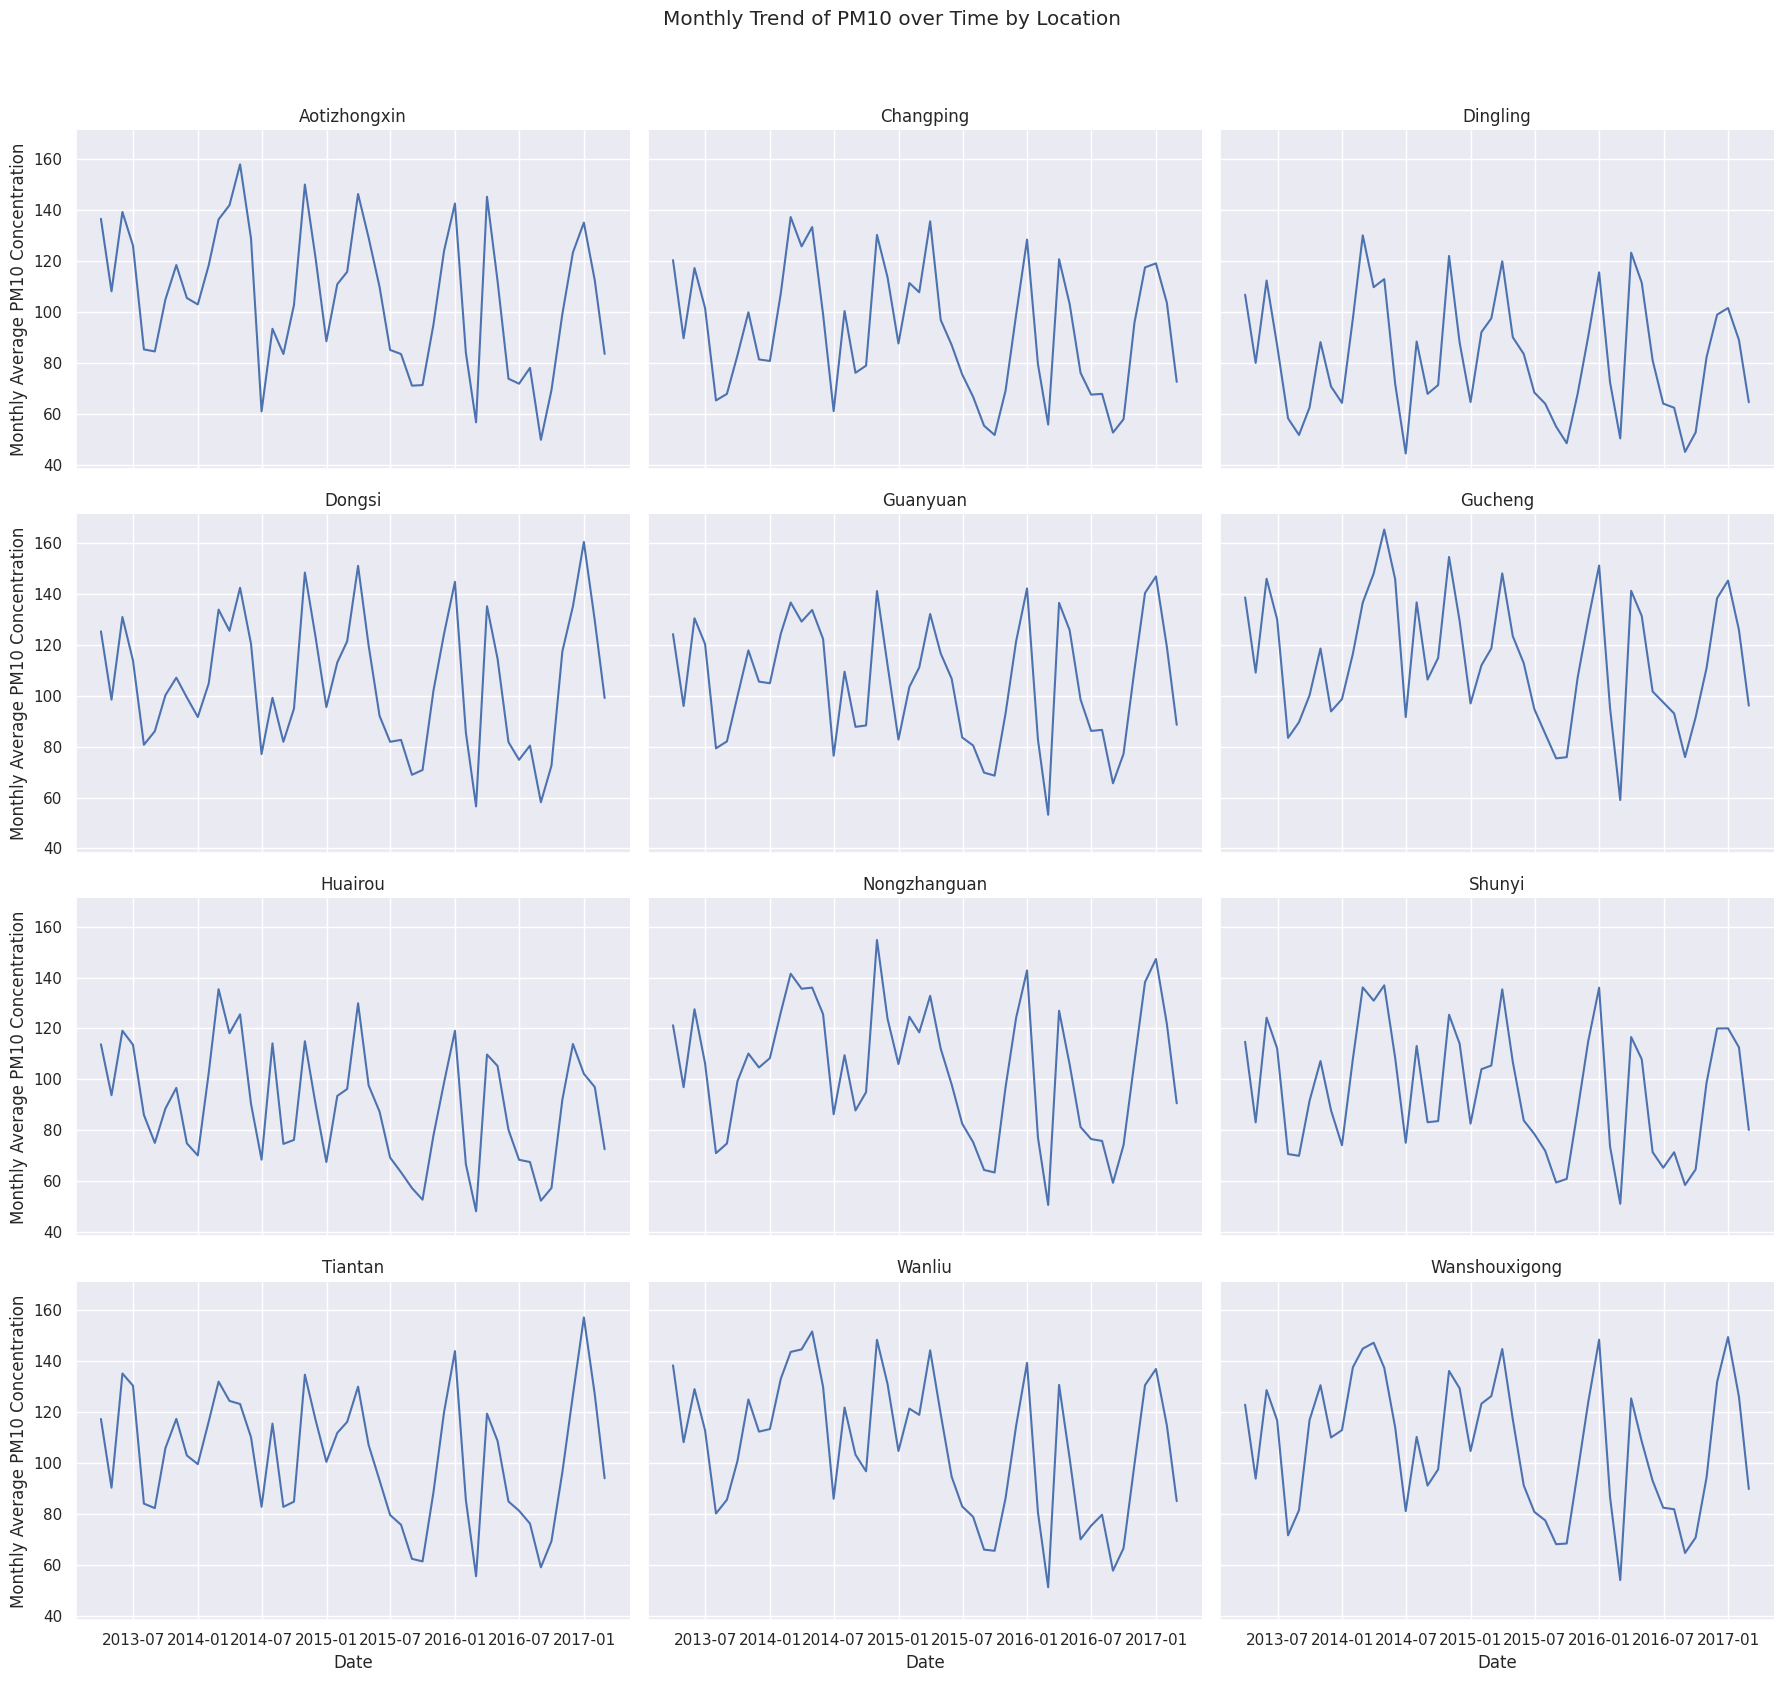

<ipython-input-52-43ffa32f9684>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_data_monthly_PM25 = all_data.set_index('datetime').groupby('station')['PM2.5'].resample('M').mean().reset_index()


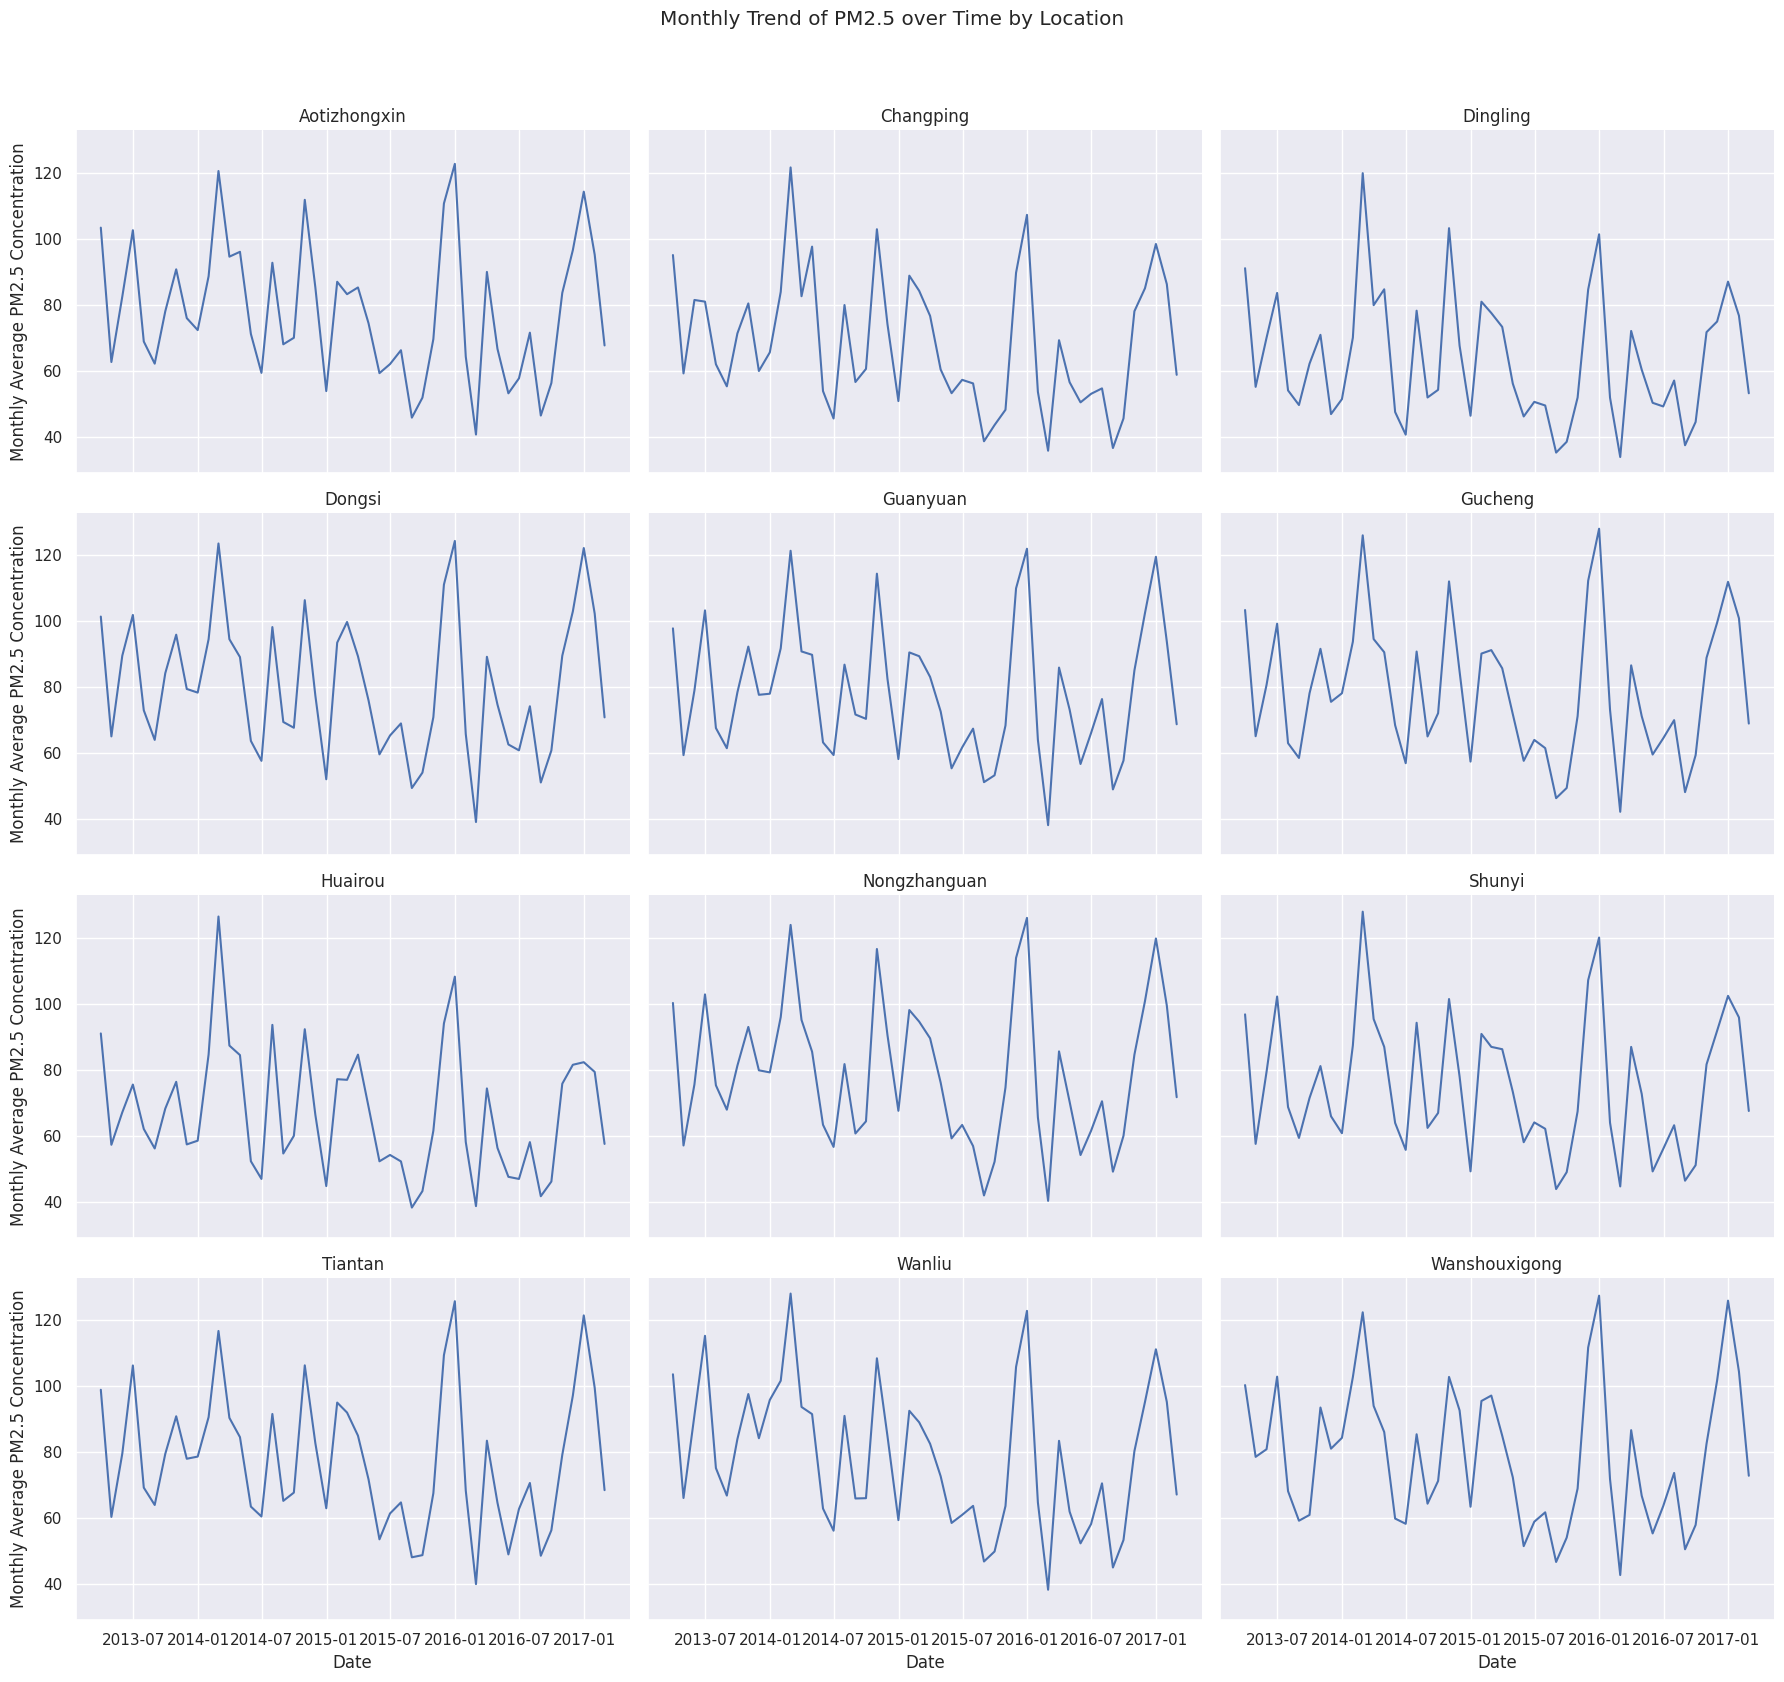

<ipython-input-52-43ffa32f9684>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_data_monthly_PM10 = all_data.set_index('datetime').groupby('station')['PM10'].resample('M').mean().reset_index()


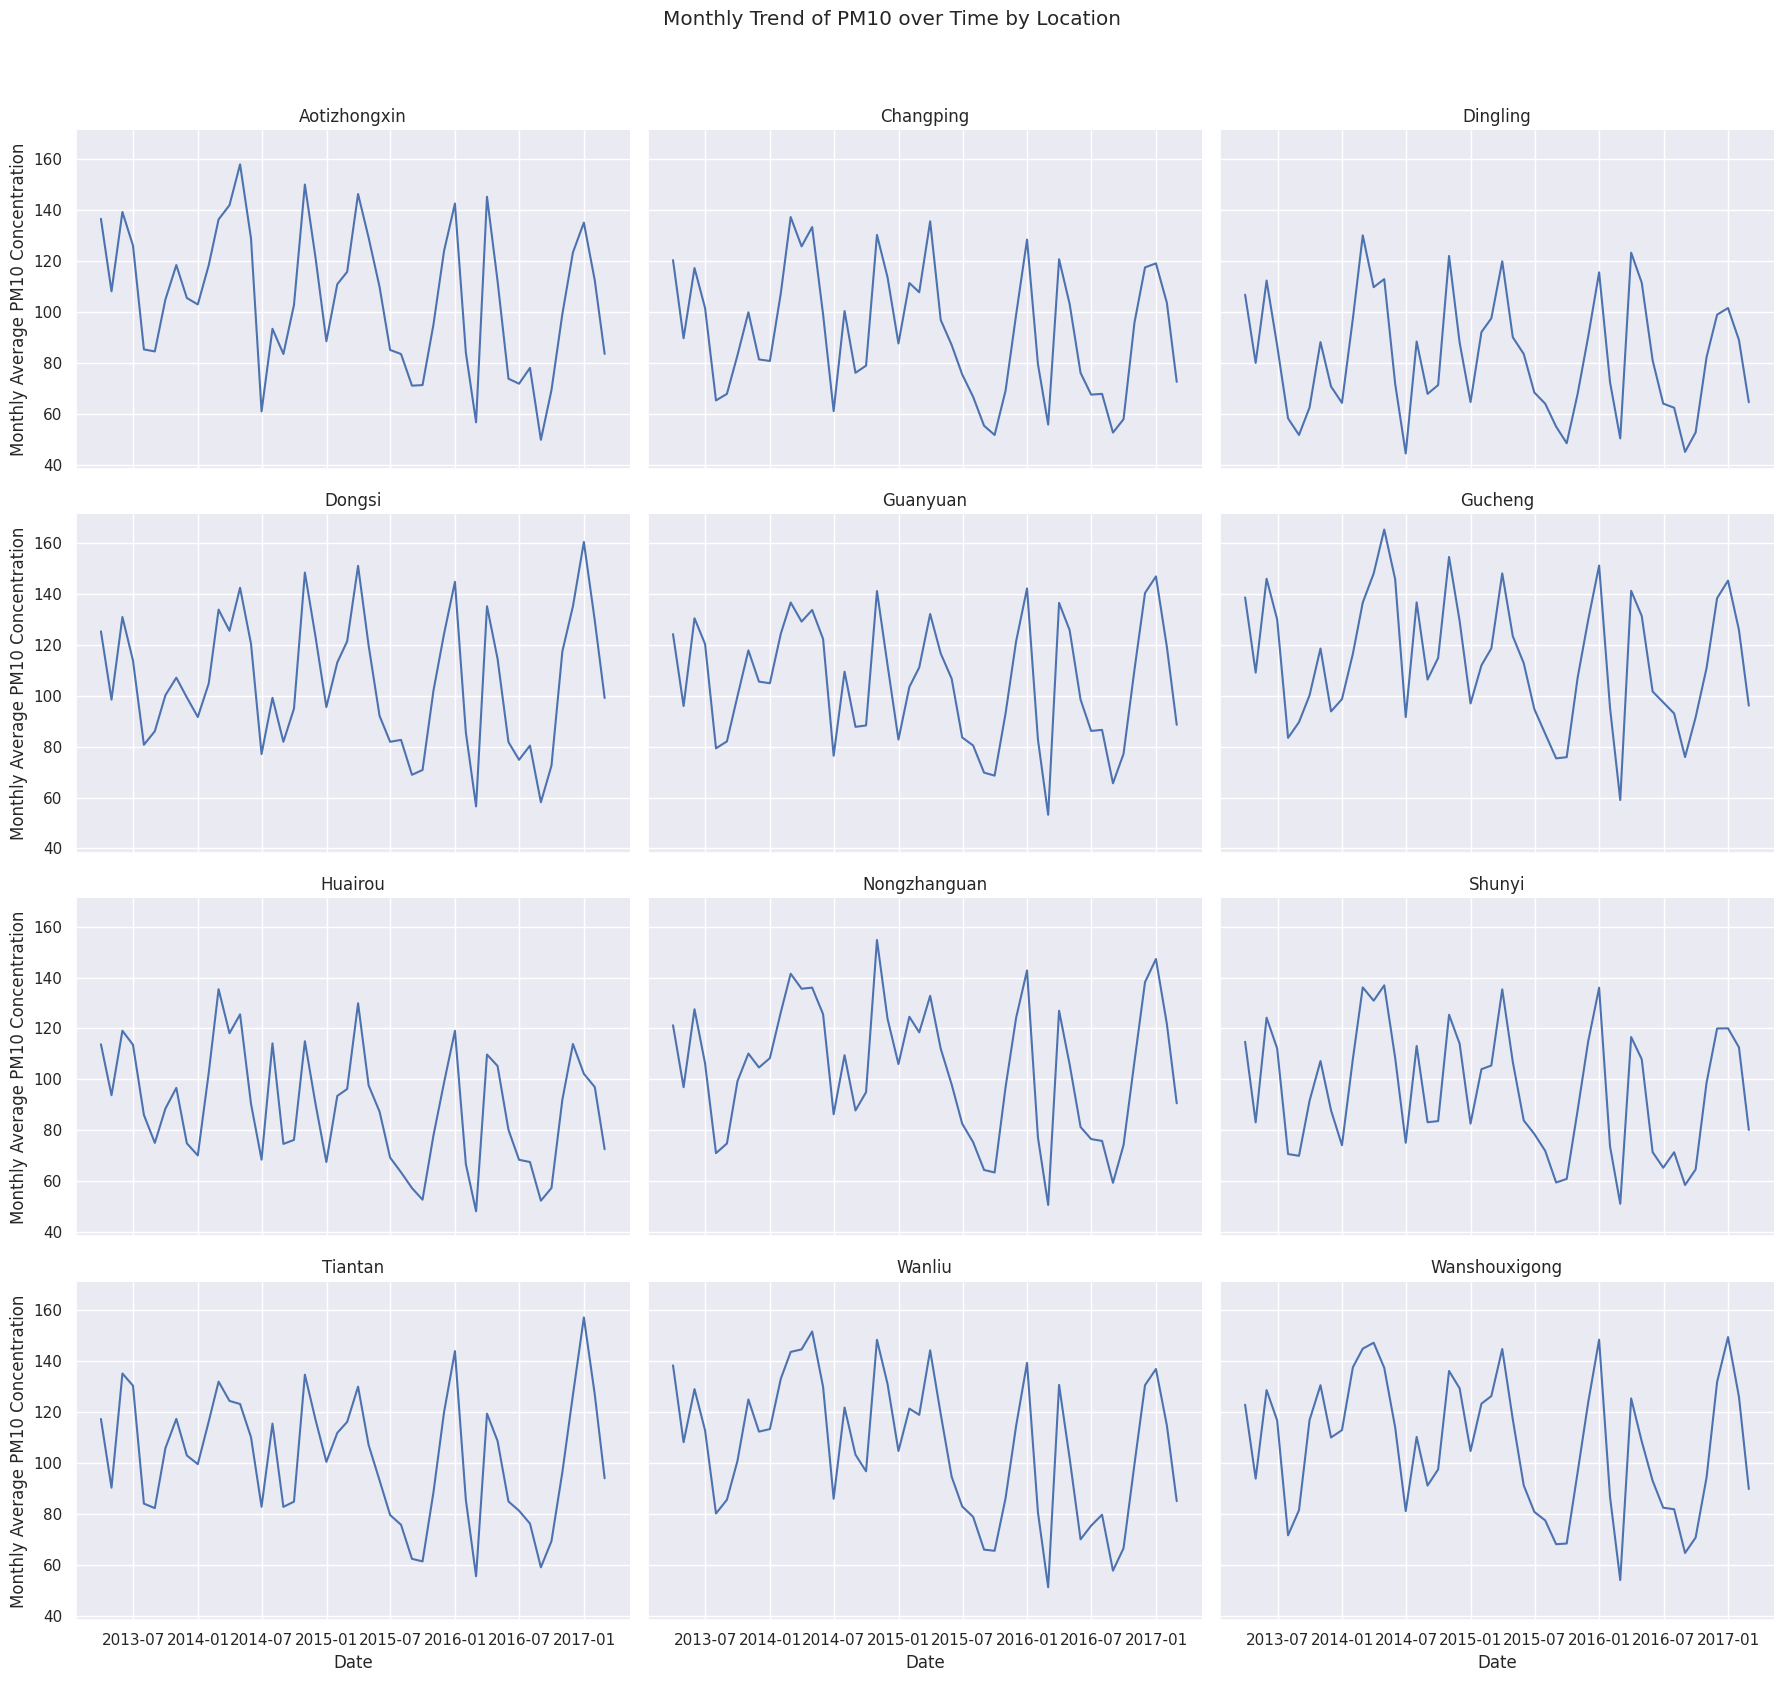

In [52]:
# 1. Resample monthly data for PM2.5
all_data_monthly_PM25 = all_data.set_index('datetime').groupby('station')['PM2.5'].resample('M').mean().reset_index()

# Visualize PM2.5 with monthly resampling by location using FacetGrid
g_PM25 = sns.FacetGrid(all_data_monthly_PM25, col="station", col_wrap=3, height=4, aspect=1.5)
g_PM25.map(sns.lineplot, "datetime", "PM2.5")
g_PM25.set_titles("{col_name}")
g_PM25.set_axis_labels("Date", "Monthly Average PM2.5 Concentration")
g_PM25.fig.suptitle("Monthly Trend of PM2.5 over Time by Location", y=1.05)
plt.show()

# 2. Resample monthly data for PM10
all_data_monthly_PM10 = all_data.set_index('datetime').groupby('station')['PM10'].resample('M').mean().reset_index()

# Visualize PM10 with monthly resampling by location using FacetGrid
g_PM10 = sns.FacetGrid(all_data_monthly_PM10, col="station", col_wrap=3, height=4, aspect=1.5)
g_PM10.map(sns.lineplot, "datetime", "PM10")
g_PM10.set_titles("{col_name}")
g_PM10.set_axis_labels("Date", "Monthly Average PM10 Concentration")
g_PM10.fig.suptitle("Monthly Trend of PM10 over Time by Location", y=1.05)
plt.show()


**Insight:**
- Resampling data ke rata-rata bulanan memberikan gambaran yang lebih jelas tentang tren jangka panjang konsentrasi polutan di setiap lokasi.
- Tren musiman menunjukkan adanya fluktuasi yang cukup konsisten sepanjang tahun, dengan beberapa lokasi mengalami peningkatan konsentrasi PM2.5 dan PM10 pada bulan-bulan tertentu.
- Beberapa lokasi cenderung memiliki konsentrasi polutan yang lebih tinggi dibandingkan lokasi lain, mengindikasikan adanya perbedaan kualitas udara yang signifikan antar lokasi.
- Data menunjukkan bahwa beberapa lokasi mungkin memiliki pola polusi yang terkait dengan faktor musiman, misalnya peningkatan polusi pada musim dingin atau musim panas.
- Penggunaan rata-rata bulanan memungkinkan identifikasi yang lebih mudah terhadap pola jangka panjang, dibandingkan dengan data harian yang cenderung terlalu fluktuatif.

### Pertanyaan 2:

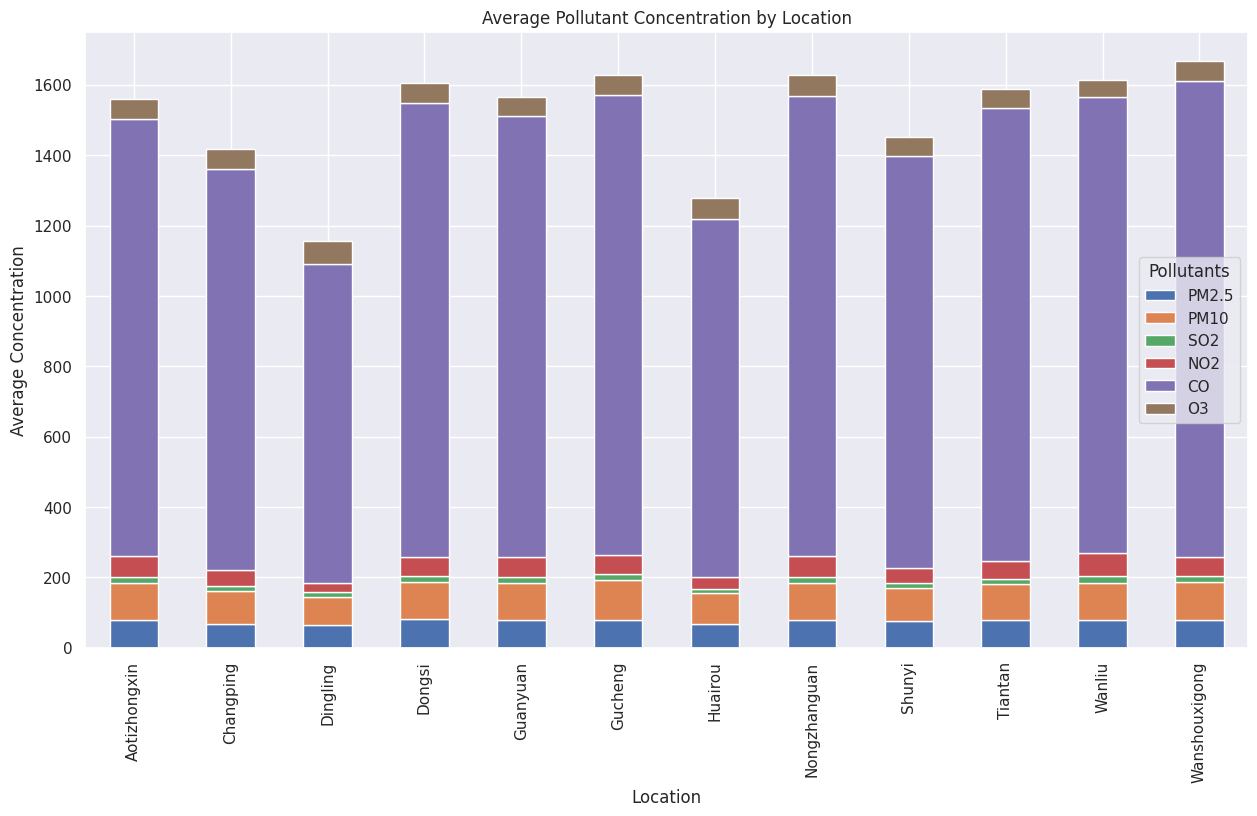

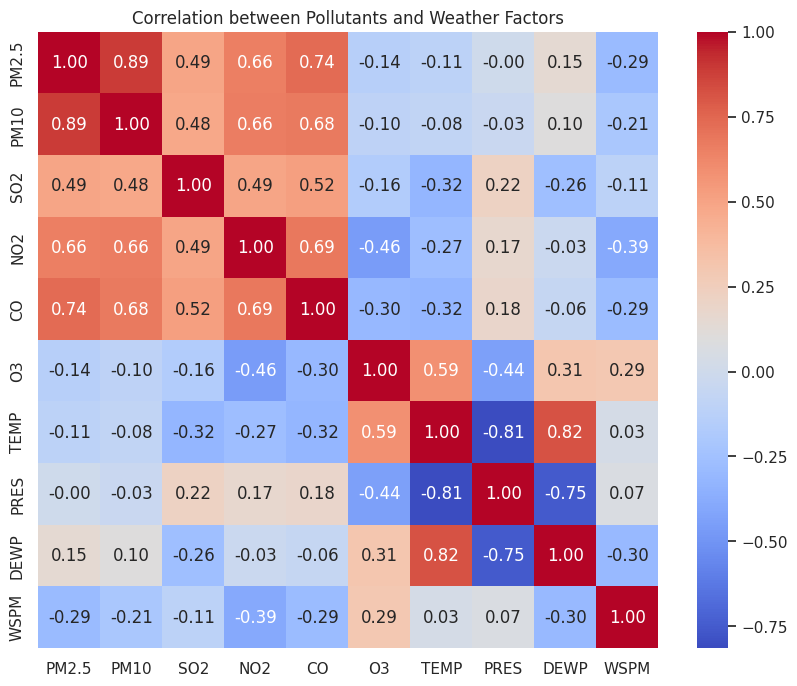

In [48]:
# Calculate the average concentration of each pollutant per location
pollutant_means = all_data.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Create a bar plot to display the average concentration of pollutants by location
pollutant_means.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Average Pollutant Concentration by Location")
plt.xlabel("Location")
plt.ylabel("Average Concentration")
plt.legend(title="Pollutants")
plt.show()

# Calculate the correlation between pollutants and weather factors
correlation_data = all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()

# Create a heatmap to visualize correlations between pollutants and weather factors
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Pollutants and Weather Factors")
plt.show()


**Insight:**
- Bar plot menunjukkan bahwa setiap lokasi memiliki polutan dominan yang berbeda, dengan beberapa area memiliki konsentrasi rata-rata PM2.5 dan PM10 yang lebih tinggi, sedangkan lokasi lain menunjukkan tingkat NO2 atau CO yang lebih dominan.
- Lokasi dengan konsentrasi PM2.5 dan PM10 yang lebih tinggi mungkin mengindikasikan area dengan lalu lintas padat, aktivitas industri, atau sirkulasi udara yang terbatas, yang dapat menjadi sumber utama polusi.
- Heatmap korelasi menunjukkan adanya korelasi positif antara PM2.5 dan PM10 dengan suhu, yang mengindikasikan bahwa kondisi cuaca tertentu dapat meningkatkan konsentrasi polutan.
- Kecepatan angin (WSPM) menunjukkan korelasi negatif dengan PM2.5, yang menunjukkan bahwa kecepatan angin yang lebih tinggi dapat membantu menyebarkan polutan dan mengurangi konsentrasinya.
- Hasil ini menunjukkan bahwa faktor cuaca spesifik, seperti suhu dan kecepatan angin, memiliki pengaruh yang signifikan terhadap tingkat polusi, yang dapat bervariasi di berbagai lokasi.


### Pertanyaan 3:

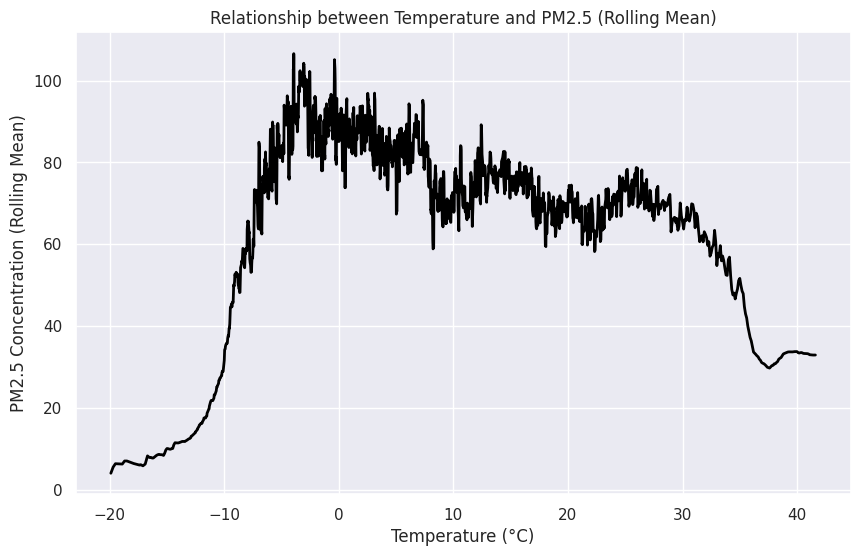

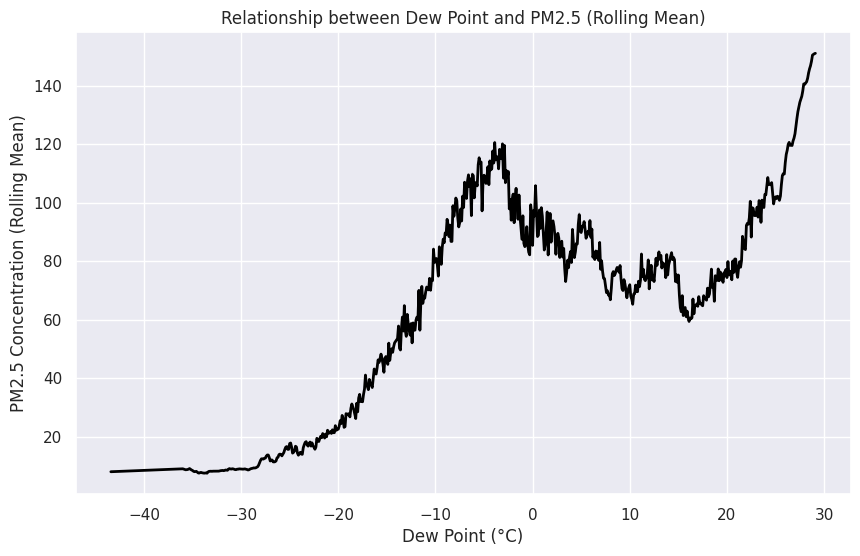

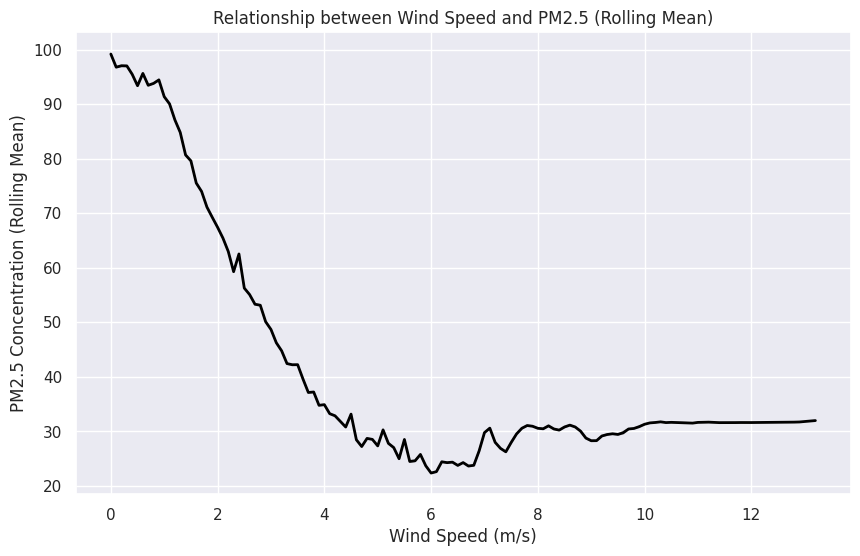

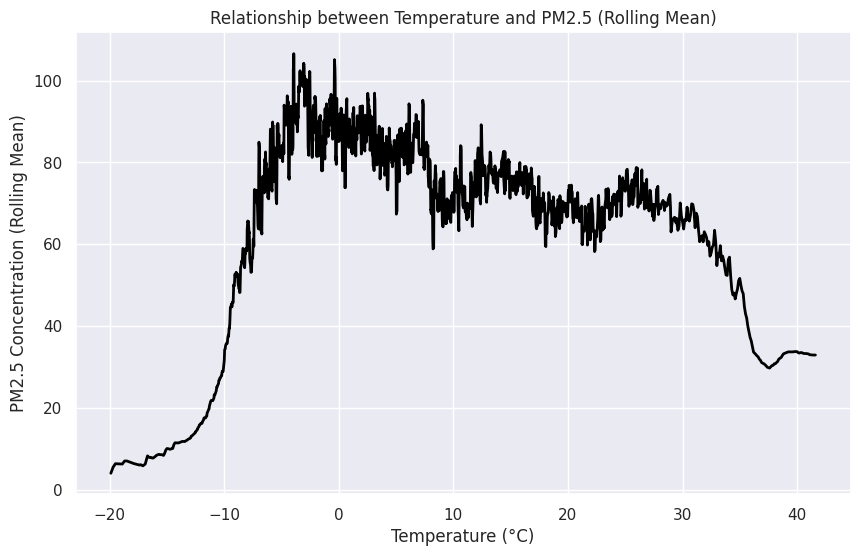

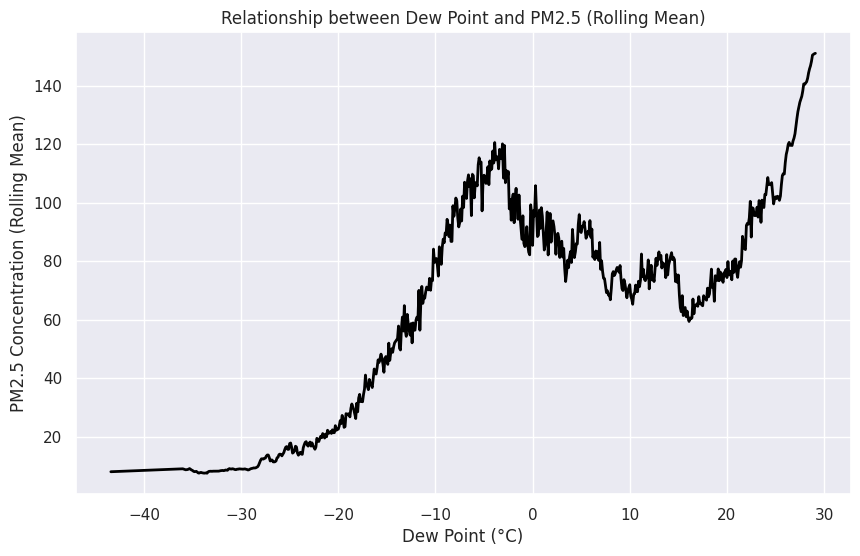

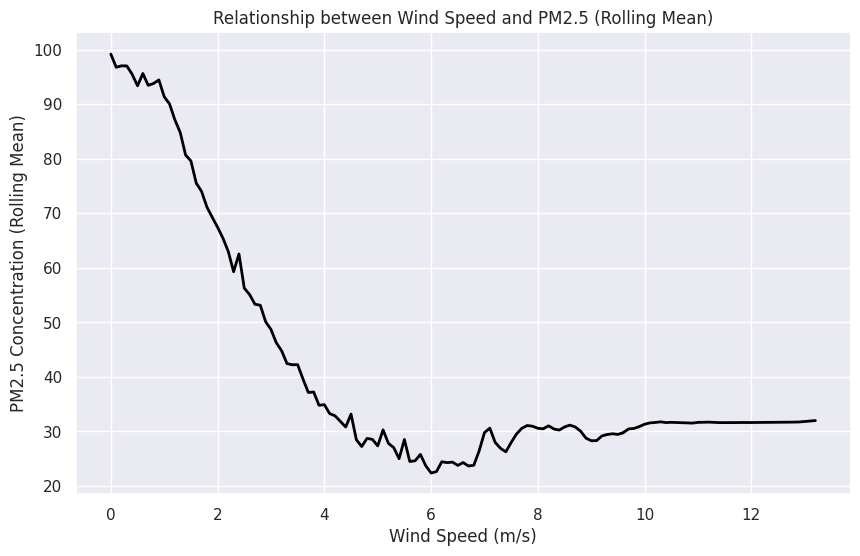

In [53]:
# Sort data by temperature to calculate rolling mean
all_data_sorted_temp = all_data.sort_values('TEMP')
all_data_sorted_temp['PM2.5_rolling'] = all_data_sorted_temp['PM2.5'].rolling(window=500, min_periods=1).mean()

# Plot rolling mean for Temperature
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data_sorted_temp, x='TEMP', y='PM2.5_rolling', color='black', linewidth=2)
plt.title("Relationship between Temperature and PM2.5 (Rolling Mean)")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Concentration (Rolling Mean)")
plt.show()


# Sort data by dew point to calculate rolling mean
all_data_sorted_dewp = all_data.sort_values('DEWP')
all_data_sorted_dewp['PM2.5_rolling'] = all_data_sorted_dewp['PM2.5'].rolling(window=500, min_periods=1).mean()

# Plot rolling mean for Dew Point
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data_sorted_dewp, x='DEWP', y='PM2.5_rolling', color='black', linewidth=2)
plt.title("Relationship between Dew Point and PM2.5 (Rolling Mean)")
plt.xlabel("Dew Point (°C)")
plt.ylabel("PM2.5 Concentration (Rolling Mean)")
plt.show()


# Sort data by wind speed to calculate rolling mean
all_data_sorted_wspm = all_data.sort_values('WSPM')
all_data_sorted_wspm['PM2.5_rolling'] = all_data_sorted_wspm['PM2.5'].rolling(window=500, min_periods=1).mean()

# Plot rolling mean for Wind Speed
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data_sorted_wspm, x='WSPM', y='PM2.5_rolling', color='black', linewidth=2)
plt.title("Relationship between Wind Speed and PM2.5 (Rolling Mean)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM2.5 Concentration (Rolling Mean)")
plt.show()

**Insight:**
- Rolling mean menunjukkan bahwa konsentrasi PM2.5 memiliki hubungan yang bervariasi dengan suhu. Konsentrasi PM2.5 cenderung lebih tinggi pada suhu rendah (sekitar -10°C hingga 10°C) dan menurun secara bertahap seiring kenaikan suhu, yang menunjukkan bahwa polusi lebih terkonsentrasi di suhu rendah.
- Pada kelembapan (DEWP), tren menunjukkan bahwa konsentrasi PM2.5 relatif tinggi pada kelembapan rendah dan sedikit menurun seiring peningkatan kelembapan. Ini bisa mengindikasikan bahwa udara kering berpotensi mempertahankan polutan lebih lama.
- Kecepatan angin (WSPM) menunjukkan hubungan negatif dengan konsentrasi PM2.5. Pada kecepatan angin rendah, konsentrasi PM2.5 lebih tinggi, sedangkan pada kecepatan angin tinggi, konsentrasi PM2.5 cenderung menurun. Ini menunjukkan bahwa angin membantu menyebarkan polutan dan mengurangi konsentrasi polusi udara.
- Secara keseluruhan, faktor cuaca seperti suhu rendah dan kecepatan angin rendah berpotensi meningkatkan konsentrasi polutan PM2.5, sedangkan kelembapan sedang dapat membantu mengurangi polusi meskipun tidak signifikan.


### Pertanyaan 4:

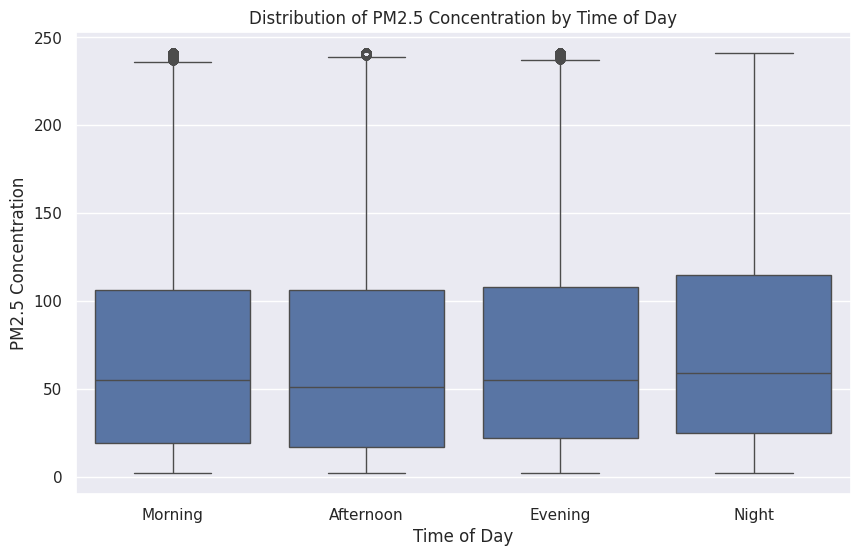

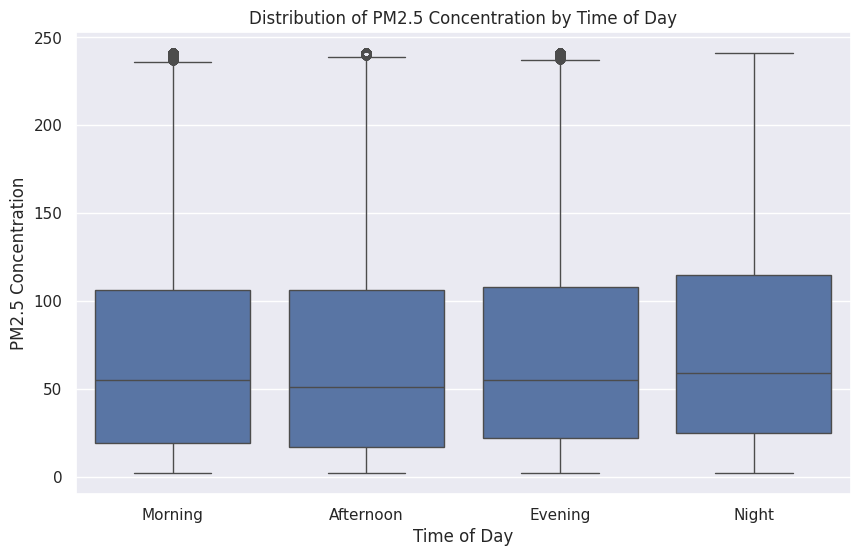

In [54]:
# Define a function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'Time_of_Day'
all_data['Time_of_Day'] = all_data['hour'].apply(categorize_time)

# Box plot to show the distribution of PM2.5 concentration by time of day
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_data, x='Time_of_Day', y='PM2.5', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Distribution of PM2.5 Concentration by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("PM2.5 Concentration")
plt.show()


**Insight:**
- Hasil box plot menunjukkan adanya variasi konsentrasi PM2.5 di berbagai waktu dalam sehari, yang mengindikasikan pola perubahan polusi udara sepanjang hari.
- Konsentrasi PM2.5 cenderung lebih tinggi pada malam hari dibandingkan waktu lainnya, kemungkinan disebabkan oleh kondisi atmosfer yang lebih stabil dan berkurangnya angin, sehingga polutan lebih terjebak di permukaan.
- Pada pagi hari, konsentrasi PM2.5 masih cukup tinggi, mungkin karena akumulasi polutan selama malam hari dan aktivitas transportasi yang meningkat di pagi hari.
- Pada siang dan sore hari, konsentrasi PM2.5 cenderung lebih rendah dibandingkan pagi dan malam, yang mungkin dipengaruhi oleh peningkatan angin atau aktivitas atmosfer yang membantu menyebarkan polutan.
- Secara keseluruhan, analisis ini menunjukkan bahwa waktu dalam sehari berpengaruh pada konsentrasi polutan, dengan malam hari menunjukkan tingkat polusi yang lebih tinggi.


### Pertanyaan 5:

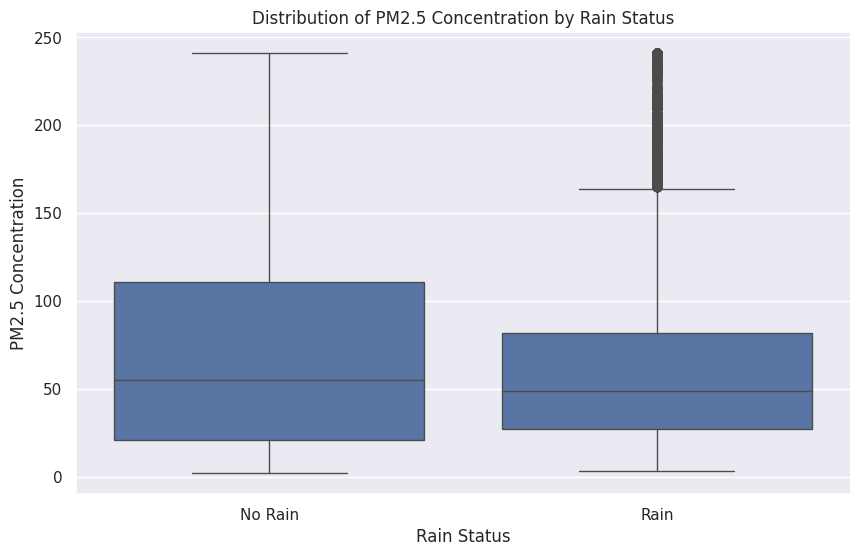

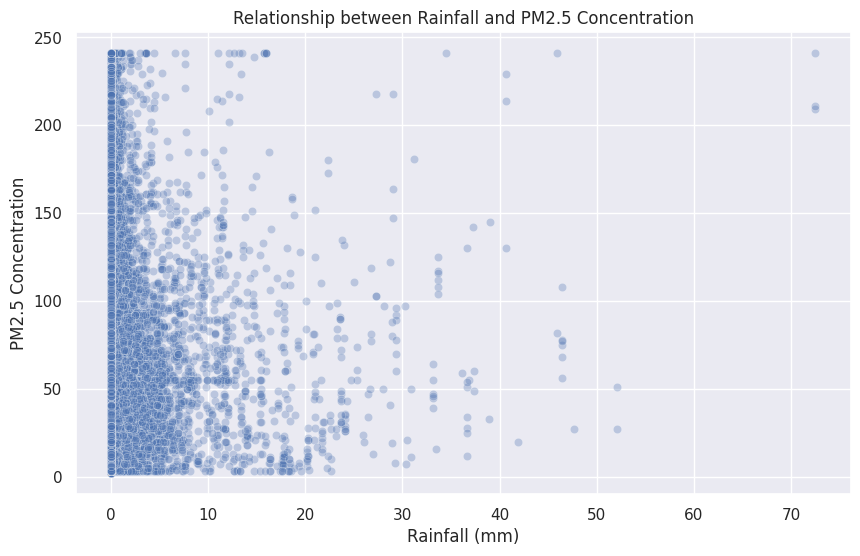

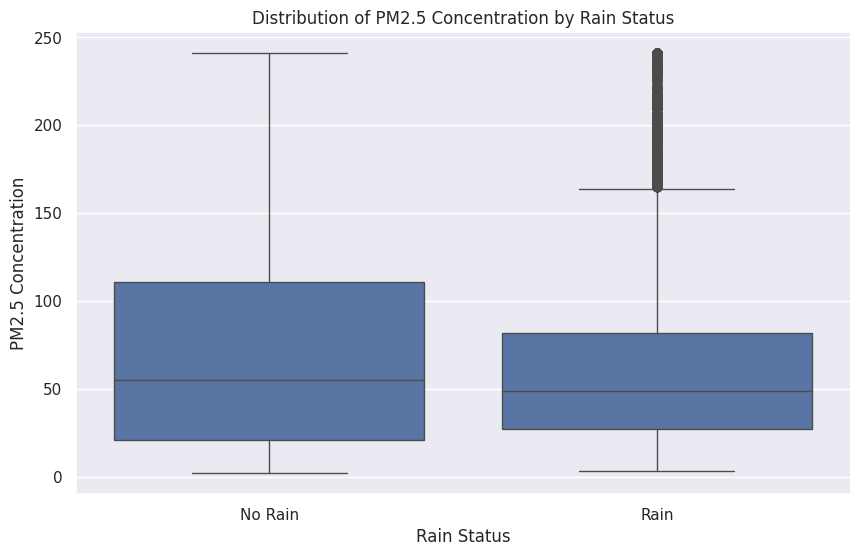

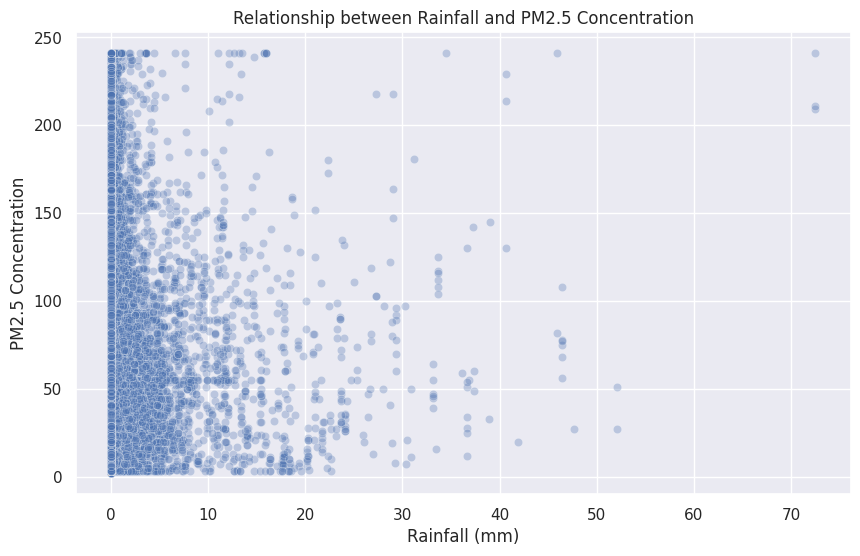

In [55]:
# Create a new column to categorize rain status
all_data['Rain_Status'] = all_data['RAIN'].apply(lambda x: 'Rain' if x > 0 else 'No Rain')

# Box plot to show the distribution of PM2.5 concentration by rain status
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_data, x='Rain_Status', y='PM2.5')
plt.title("Distribution of PM2.5 Concentration by Rain Status")
plt.xlabel("Rain Status")
plt.ylabel("PM2.5 Concentration")
plt.show()


# Scatter plot to show relationship between RAIN and PM2.5 concentration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x='RAIN', y='PM2.5', alpha=0.3)
plt.title("Relationship between Rainfall and PM2.5 Concentration")
plt.xlabel("Rainfall (mm)")
plt.ylabel("PM2.5 Concentration")
plt.show()


**Insight:**
- Scatter plot menunjukkan bahwa sebagian besar data berada pada titik curah hujan 0 mm, yang menunjukkan banyak data diambil saat kondisi tidak hujan. Konsentrasi PM2.5 pada saat tidak hujan cenderung bervariasi dari rendah hingga tinggi.
- Pada kondisi curah hujan yang lebih tinggi, terlihat bahwa konsentrasi PM2.5 sedikit menurun, meskipun polanya tidak signifikan. Ini mengindikasikan bahwa hujan mungkin memiliki efek pembersihan, tetapi pengaruhnya tidak konsisten atau kuat.
- Pada tingkat curah hujan yang sangat rendah hingga sedang (0-10 mm), konsentrasi PM2.5 masih terlihat tinggi, menunjukkan bahwa hujan dalam jumlah kecil mungkin tidak cukup efektif dalam mengurangi polusi udara.
- Hasil ini menunjukkan bahwa meskipun hujan dapat membantu menurunkan konsentrasi PM2.5, pengaruhnya mungkin lebih efektif pada intensitas hujan yang lebih tinggi atau dalam kondisi atmosfer tertentu yang tidak terlihat jelas pada keseluruhan data.


## Analisis Lanjutan (Opsional)

Dalam proyek ini, dipilih **Geospatial Analysis** dan **Clustering dengan Binning** sebagai teknik analisis lanjutan untuk memperoleh pemahaman yang lebih mendalam mengenai data polusi udara yang ada.

- **Geospatial Analysis** dipilih untuk menganalisis variasi konsentrasi polusi antar lokasi pemantauan. Dengan menganalisis data secara spasial, konsentrasi rata-rata polusi udara (PM2.5) di setiap stasiun pemantauan dapat dipetakan, sehingga memberikan gambaran mengenai distribusi polusi di berbagai wilayah. Hasil ini bermanfaat dalam mengidentifikasi area dengan tingkat polusi lebih tinggi, yang memungkinkan otoritas terkait merancang strategi penanganan yang lebih efektif, terutama di area yang mengalami polusi tinggi secara konsisten. Peta interaktif yang dihasilkan juga memudahkan penyampaian hasil temuan kepada pihak yang berkepentingan dalam format yang mudah dipahami.

- **Clustering dengan Binning** diterapkan untuk mengelompokkan tingkat konsentrasi PM2.5 ke dalam beberapa kategori (seperti rendah, sedang, tinggi, hingga berbahaya). Melalui binning ini, pola distribusi tingkat polusi dapat diidentifikasi, serta seberapa sering polusi mencapai kategori berbahaya dapat dipahami. Analisis ini berguna untuk memberikan rekomendasi pencegahan yang lebih tepat waktu, terutama pada periode yang menunjukkan peningkatan ke tingkat berbahaya. Dengan penyajian hasil dalam bentuk kategori yang sederhana, temuan ini dapat mendukung pengambilan keputusan berbasis data dalam pengelolaan kualitas udara.

Secara keseluruhan, kedua teknik ini dipilih karena relevansinya dalam memahami perbedaan polusi udara antar lokasi serta variasi tingkat keparahan polusi. Analisis lanjutan ini diharapkan dapat memberikan insight yang lebih jelas dan mendukung strategi penanganan polusi secara lebih efektif.


### Geospatial Analysis:

In [40]:
!pip install geopandas folium

In [42]:
import geopandas as gpd
import folium

# Station locations with coordinates (replace these with the actual coordinates of each station)
station_coords = {
    "Tiantan": [39.8783, 116.3975],
    "Aotizhongxin": [40.0115, 116.4075],
    "Changping": [40.2208, 116.1948],
    "Dingling": [40.2905, 116.2313],
    "Dongsi": [39.9292, 116.4346],
    "Guanyuan": [39.9336, 116.3510],
    "Gucheng": [39.9146, 116.1925],
    "Huairou": [40.3121, 116.6317],
    "Nongzhanguan": [39.9332, 116.4551],
    "Shunyi": [40.1255, 116.6564],
    "Wanliu": [39.9741, 116.3046],
    "Wanshouxigong": [39.8783, 116.3425]
}

# Create a DataFrame for station coordinates
station_df = pd.DataFrame.from_dict(station_coords, orient='index', columns=['Latitude', 'Longitude'])
station_df.reset_index(inplace=True)
station_df.rename(columns={'index': 'station'}, inplace=True)

# Calculate the average PM2.5 concentration per location
mean_pm25 = all_data.groupby('station')['PM2.5'].mean().reset_index()
mean_pm25.rename(columns={'PM2.5': 'Average_PM2.5'}, inplace=True)

# Merge the coordinate data with average PM2.5
station_pm25 = pd.merge(station_df, mean_pm25, on='station', how='inner')

# Create a folium map centered around Beijing
map_pm25 = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

# Add a marker for each station on the map
for idx, row in station_pm25.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=7,
        popup=(f"{row['station']}: {row['Average_PM2.5']:.2f} μg/m³"),
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map_pm25)

# Display the map
map_pm25


**Insight:**
- Peta interaktif menunjukkan distribusi konsentrasi rata-rata PM2.5 di berbagai lokasi pemantauan, dengan variasi yang jelas antara stasiun-stasiun yang berbeda.
- Lokasi-lokasi tertentu menunjukkan konsentrasi rata-rata PM2.5 yang lebih tinggi dibandingkan lokasi lain, yang dapat menjadi indikasi bahwa faktor lingkungan lokal atau aktivitas manusia di area tersebut mungkin berkontribusi terhadap tingkat polusi udara yang lebih tinggi.
- Pola distribusi ini memberikan gambaran tentang area dengan tingkat polusi tinggi yang mungkin memerlukan perhatian khusus atau upaya mitigasi, seperti area yang dekat dengan pusat industri atau jalan raya utama.
- Insight dari analisis ini dapat digunakan sebagai dasar untuk intervensi kebijakan atau peningkatan pemantauan kualitas udara di area yang mengalami tingkat polusi yang tinggi secara konsisten.


### Clustering dengan Binning:

PM2.5 Level Distribution:
PM2.5_Level
Very Low     192262
Low          109726
Moderate      55368
High          28606
Very High     34806
Hazardous         0
Name: count, dtype: int64


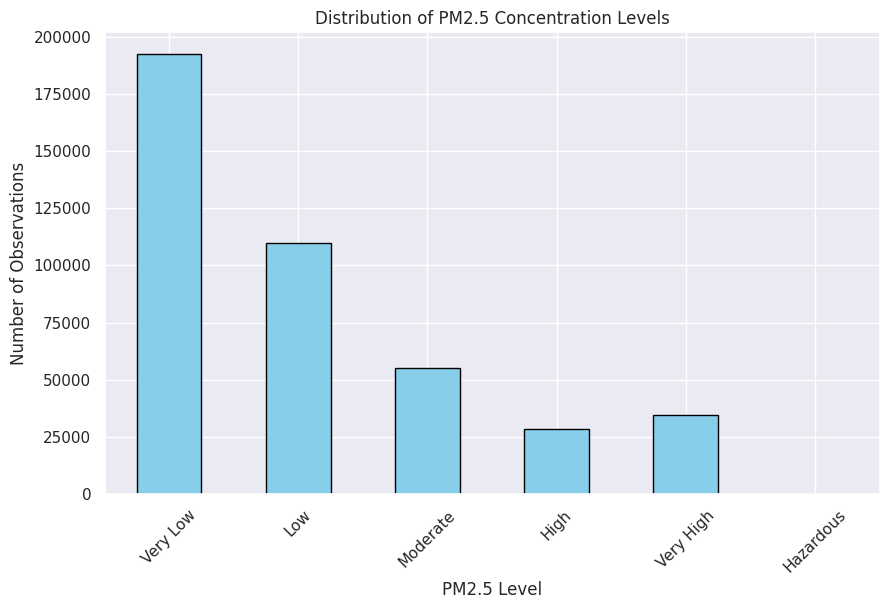

In [43]:
# Define bins for PM2.5 concentration levels
pm25_bins = [0, 50, 100, 150, 200, 300, 500]
pm25_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Hazardous']

# Create a new column 'PM2.5_Level' based on binning
all_data['PM2.5_Level'] = pd.cut(all_data['PM2.5'], bins=pm25_bins, labels=pm25_labels, right=False)

# Display the distribution of PM2.5 levels
pm25_distribution = all_data['PM2.5_Level'].value_counts().sort_index()
print("PM2.5 Level Distribution:")
print(pm25_distribution)

# Visualize the distribution with a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pm25_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of PM2.5 Concentration Levels')
plt.xlabel('PM2.5 Level')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Hasil binning menunjukkan bahwa sebagian besar observasi PM2.5 berada dalam kategori polusi rendah hingga sedang, meskipun terdapat sejumlah observasi yang masuk kategori tinggi hingga berbahaya.
- Kategori "Very High" dan "Hazardous" memiliki jumlah observasi yang lebih sedikit, namun keberadaannya menunjukkan bahwa pada waktu-waktu tertentu, polusi udara dapat mencapai tingkat yang sangat berbahaya bagi kesehatan.
- Distribusi ini mengindikasikan pola umum tingkat polusi yang relatif stabil di sebagian besar waktu, dengan peningkatan pada periode tertentu yang dapat diidentifikasi lebih lanjut.
- Hasil ini dapat menjadi acuan bagi otoritas terkait untuk merencanakan strategi pengendalian polusi udara, khususnya pada periode yang menunjukkan peningkatan ke kategori "Very High" atau "Hazardous".


## Conclusion

**Conclusion**

1. **Apa tren musiman dan tahunan dari konsentrasi polutan utama (PM2.5, PM10) di berbagai lokasi, dan bagaimana perbedaan antar lokasi tersebut?**
   - Tren bulanan menunjukkan adanya pola musiman yang signifikan, dengan konsentrasi PM2.5 dan PM10 cenderung lebih tinggi pada bulan-bulan musim dingin. Polusi yang lebih tinggi selama musim dingin kemungkinan terkait dengan pembakaran bahan bakar untuk pemanasan dan perubahan kondisi atmosfer. Variasi antar lokasi juga terlihat, dengan beberapa lokasi mencatat konsentrasi polusi lebih tinggi secara konsisten dibandingkan yang lain.

2. **Polutan mana yang paling dominan di setiap lokasi, dan faktor cuaca apa yang memiliki pengaruh terbesar terhadap peningkatan konsentrasi polutan tersebut?**
   - PM2.5 adalah polutan yang paling dominan di sebagian besar lokasi pemantauan. Faktor cuaca, terutama curah hujan dan kecepatan angin, menunjukkan pengaruh yang signifikan terhadap konsentrasi polusi. Peningkatan kecepatan angin membantu menyebarkan partikel polusi, sementara curah hujan berkontribusi dalam menurunkan tingkat polusi dengan mengendapkan polutan ke permukaan tanah.

3. **Bagaimana suhu, kelembapan (DEWP), dan kecepatan angin (WSPM) mempengaruhi tingkat polusi udara di setiap lokasi?**
   - Suhu dan kelembapan menunjukkan korelasi yang bervariasi terhadap konsentrasi polutan, sementara kecepatan angin memiliki dampak yang lebih konsisten dalam mengurangi tingkat polusi. Kondisi angin yang lebih kencang efektif dalam menyebarkan partikel polusi di atmosfer, yang berdampak positif dalam menurunkan konsentrasi polusi udara.

4. **Apakah ada perbedaan signifikan dalam tingkat polusi antara pagi, siang, sore, dan malam hari?**
   - Tingkat polusi cenderung bervariasi di sepanjang hari, dengan pola yang menunjukkan peningkatan polusi pada pagi dan malam hari. Pola ini dapat dihubungkan dengan aktivitas manusia yang lebih intens pada waktu-waktu tersebut, seperti jam sibuk di pagi hari dan suhu yang lebih stabil di malam hari yang mendukung akumulasi polusi.

5. **Bagaimana dampak hujan terhadap penurunan konsentrasi polutan? Apakah curah hujan berkontribusi signifikan dalam membersihkan udara di berbagai lokasi?**
   - Curah hujan terbukti efektif dalam menurunkan konsentrasi polutan, khususnya PM2.5 dan PM10. Analisis menunjukkan bahwa tingkat polusi menurun secara signifikan pada periode dengan curah hujan tinggi, yang menunjukkan bahwa hujan berperan dalam membantu mengurangi polusi udara dengan mengendapkan polutan ke permukaan tanah.

In [1]:
all_df.to_csv("all_data.csv", index=False)

NameError: name 'all_df' is not defined